In [4]:
import numpy as np
import albumentations as al
import cv2 as cv
import matplotlib.pyplot as plt

<h2>Albumentations gallery</h2>

Install by

    pip install -U albumentations
    
See https://github.com/albumentations-team/albumentations, https://albumentations.ai/docs/

In [6]:
img = cv.cvtColor(cv.imread("temp/0012.jpg"), cv.COLOR_BGR2RGB)

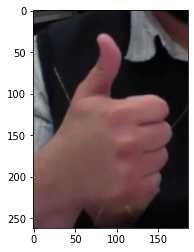

In [31]:
plt.imshow(img)

<h3>Pipeline methods</h3>

In [17]:
# argument p in [0,1] gives the probability an operation is performed when called
transform = al.Compose([
    al.HorizontalFlip(p=0.5),
    al.RandomBrightnessContrast(p=0.2),
])

In [20]:
# only keyword arguments allowed
result = transform(image=img)

# output is a dict, with one key, "image", the transformed image
print(type(result), result.keys())

In [ ]:
# In general, transform takes keywords, with its parts potentially having specified behaviour, like respecting 
# specified bounding boxes, tracking specified keypoints, or treating an image mask differently; these populate 
# the dict returned
#transformed = transform(image=img,
#                        mask=mask,
#                        bboxes=bboxes,
#                        bbox_classes=bbox_classes,
#                        keypoints=keypoints,
#                        keypoints_classes=keypoints_classes)

In [ ]:
# Composition methods
# OneOf ([transforms], p) : applies w/ prob p one of its listed transforms; their p arguments are weights for their selection
# SomeOf ([transforms], n, replace=True, p=1) : applies n of its listed transforms, sampled with or without replacement
#   These can also appear in the transform list (also Sequential, which groups transforms)
#   argument additional_targets gets the chosen transforms applied to a dict of images
#   transforms can be forced, even if otherwise would not be selected, with always_apply=True.
#      this includes the case that the Composition method applies with some probability and fails

<h3>Geometric transforms</h3>

One comparative study found rotations to be among the most effective.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136c104dc0>)

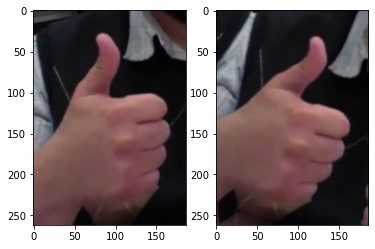

In [127]:
# Rotate by uniformly-randomly selected angle
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.Rotate(limit=30,
                                         always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136db0f070>)

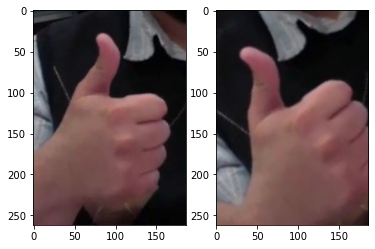

In [135]:
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.ShiftScaleRotate(shift_limit=0.0625, 
                                                   scale_limit=0.2,    
                                                   rotate_limit=30,
                                                   always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136c197ee0>)

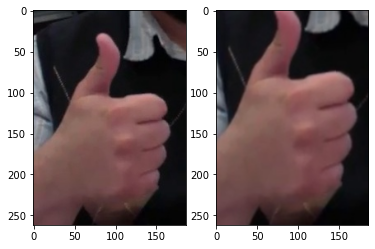

In [125]:
# "Perform a random four point perspective transform of the input."
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.Perspective(always_apply=True)(image=img)['image'])

<h3>Colour representation transforms</h3>

These act on brightness, contrast, hue, saturation, luminance.

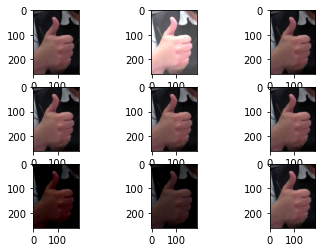

In [42]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(al.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5)(image=img)['image'])

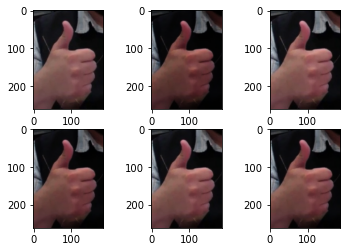

In [140]:
# "Randomly change the relationship between bright and dark areas of the image by manipulating its tone curve."
plt.subplot(2,3,1), plt.imshow(img)
for i in range(2,7):
    plt.subplot(2,3,i), plt.imshow(al.RandomToneCurve(always_apply=True)(image=img)['image'])

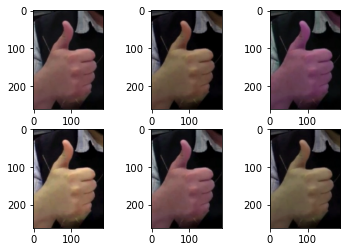

In [142]:
# Randomly changes the brightness, contrast, and saturation of an image.
plt.subplot(2,3,1), plt.imshow(img)
for i in range(2,7):
    plt.subplot(2,3,i), plt.imshow(al.ColorJitter(hue=0.1, always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136216e460>)

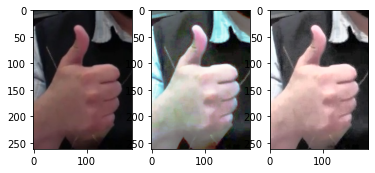

In [64]:
# "Equalize the image histogram." 
# by_channels: "If True, use equalization by channels separately, else convert image to YCbCr representation 
#               and use equalization by Y channel."
plt.subplot(1,3,1), plt.imshow(img)
plt.subplot(1,3,2), plt.imshow(al.Equalize(always_apply=True)(image=img)['image'])
plt.subplot(1,3,3), plt.imshow(al.Equalize(always_apply=True, by_channels=False)(image=img)['image'])

<h3>Sharpen methods</h3>

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x213687ad700>)

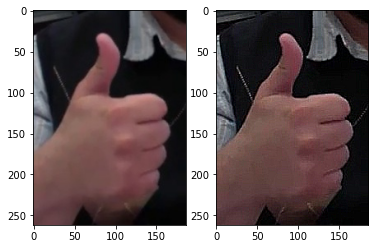

In [93]:
# Sharpen and superimpose
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.Sharpen(alpha=(0.5, 1), always_apply=True)(image=img)['image'])

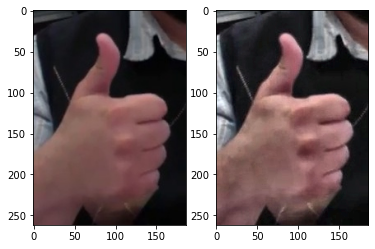

In [48]:
# Contrast Limited Adaptive Histogram Equalization
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.CLAHE(always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x213638f43d0>)

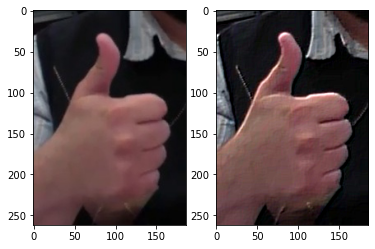

In [59]:
# Emboss and superimpose
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.Emboss(alpha=(0.5,1), strength=(0.5,1), always_apply=True)(image=img)['image'])

<h3>Blur methods</h3>

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2135dca9df0>)

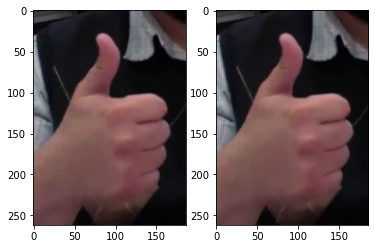

In [54]:
# "Blur the input image using a Generalized Normal filter with a randomly selected parameters. This transform also adds 
#  multiplicative noise to generated kernel before convolution." https://arxiv.org/abs/2107.10833
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.AdvancedBlur(always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21366ffeac0>)

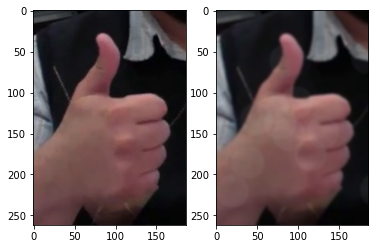

In [81]:
# "Simulates fog"
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.RandomFog(always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136a519af0>)

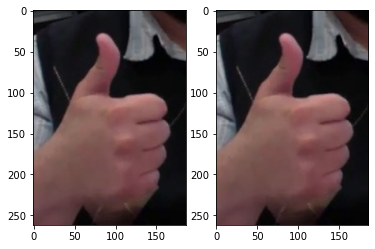

In [109]:
# "Sharpen the input image using Unsharp Masking processing" and superimpose. arxiv.org/pdf/2107.10833.pdf
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.UnsharpMask(alpha=(0.5,1), always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136565efd0>)

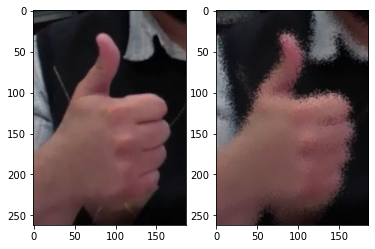

In [78]:
# through a looking glass
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.GlassBlur(always_apply=True)(image=img)['image'])

<h3>Noise addition</h3>

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21364d9c8b0>)

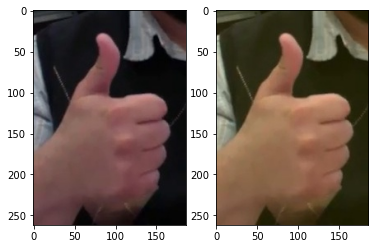

In [71]:
# Perturbs eigenvectors and eigenvalues
# http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.FancyPCA(alpha=0.5, always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x213652b1970>)

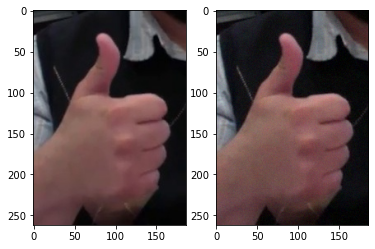

In [72]:
# Keras can do this dynamically also
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.GaussNoise(always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21366f1a880>)

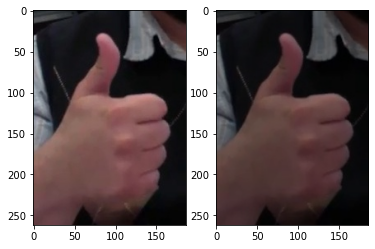

In [80]:
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.MultiplicativeNoise(multiplier=(0.5,1.5), always_apply=True)(image=img)['image'])

<h3>Occlusion/Random erasing methods</h3>

Random erasing is a well-regarded method. In one study using the CIFAR-10 dataset, fill with random noise worked best.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136aa2ba00>)

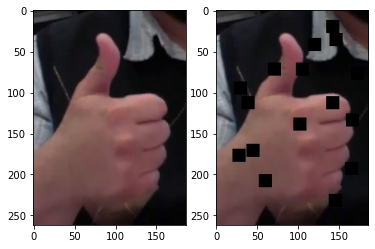

In [112]:
# GridDropout deletes regularly spaced rectangles
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.CoarseDropout(max_holes=16, max_height=16, max_width=16, 
                                                min_holes=None, min_height=None, min_width=None, 
                                                fill_value=0, always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21368af3640>)

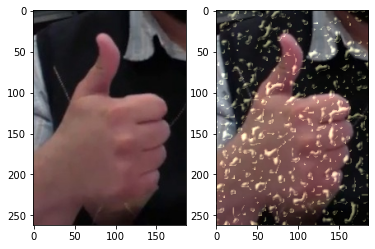

In [103]:
# "Simulates corruption which can occlude a lens in the form of rain or mud."
# 'Liquid layer' is generated as smoothed Gaussian noise and applied to the base image with a threshold cut-off and
# chosen colour. 
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.Spatter(mode='rain', 
                                          intensity=.7, 
                                          cutout_threshold=0.68, always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136a512370>)

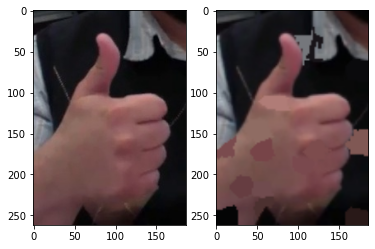

In [105]:
# Segments image and randomly replaces segments with their average colour
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.Superpixels(p_replace=0.2, always_apply=True)(image=img)['image'])

<h3>Distortion methods</h3>

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136be50eb0>)

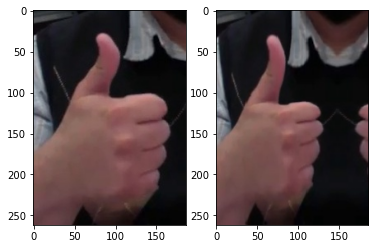

In [118]:
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.GridDistortion(num_steps=5, distort_limit=0.5,
                                                 always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136a613820>)

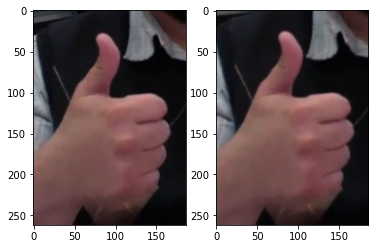

In [124]:
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.OpticalDistortion(distort_limit=0.1, 
                                                    shift_limit=0.1,
                                                    always_apply=True)(image=img)['image'])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2136f517970>)

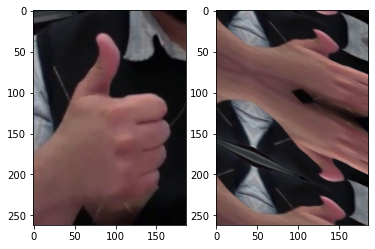

In [145]:
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.ElasticTransform(always_apply=True)(image=img)['image'])

<h3>Others</h3>

Referring to an image splicing technique, Shorten-Khoshgoftaar remark on "the sometimes unreasonable effectiveness of big data with deep learning models."

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21366e79160>)

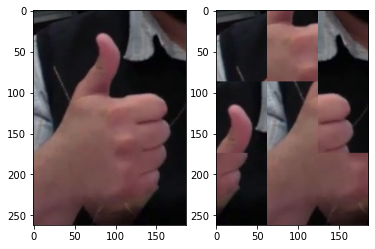

In [84]:
# Decomposes the image into a rectangular grid and shuffles the rectangles
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(al.RandomGridShuffle(grid=(3,3),always_apply=True)(image=img)['image'])

Speaking of a CNN-based style transfer method, Shorten-Khoshgoftaar write it "is a much more powerful augmentation technique than traditional color space augmentations"

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x21364dec610>)

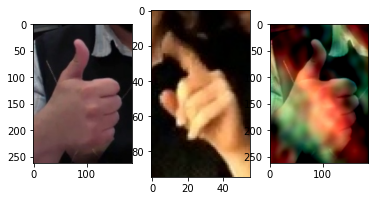

In [69]:
# Fourier Domain Adaptation style-transfer, https://github.com/YanchaoYang/FDA
# apply FFT to img, get phase and amplitude, "replace the low frequency part of the source amplitude" with that of ref_img
# example on github shows virtual- and real-world examples of similar geometry (roads, buildings,..). result is something
# like overlaying some attributes of ref_img onto the source
# These might be more interesting with better choices of reference image.
ref = "temp/0002.jpg"
plt.subplot(1,3,1), plt.imshow(img)
plt.subplot(1,3,2), plt.imshow(cv.cvtColor(cv.imread(ref), cv.COLOR_BGR2RGB))
plt.subplot(1,3,3), plt.imshow(al.FDA(reference_images=[ref], always_apply=True)(image=img)['image'])